In [1]:
# Disable TensorFlow logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Data loading

In [2]:
from utils import jsonfile
from utils import datautil
    
train_data = jsonfile.read('data/laroseda_train.json')['reviews']
test_data = jsonfile.read('data/laroseda_test.json')['reviews']

In [3]:
print(f'Reviews for train: {len(train_data)}')
print(f'Reviews for test : {len(test_data)}')

Reviews for train: 12000
Reviews for test : 3000


# Data exploration

In [4]:
print(train_data[0])

{'index': '11262', 'title': 'Foarte slab', 'content': 'ca aspect este foarte frumoasa dar cine vrea sa se joace cu tastatura nu poate', 'starRating': '1'}


In [5]:
ratings = [0 for i in range(5)] 
for entry in train_data:
    ratings[ord(entry['starRating']) - ord('1')] += 1

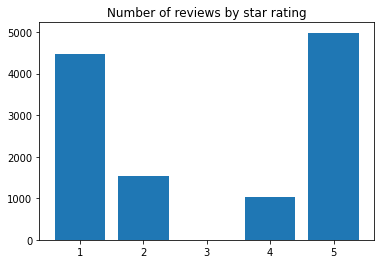

In [6]:
import matplotlib.pyplot as plt

x = ['1', '2', '3', '4', '5']
plt.title('Number of reviews by star rating')
plt.bar(x, ratings)
plt.show()

# Cleanup

In [7]:
x_train, y_train = datautil.clean(train_data)
x_test, y_test = datautil.clean(test_data)

We'll assign the '0' label for negative reviews (with 1- or 2-star ratings) and '1' for the positive reviews (with 4- or 5-star ratings).

We'll merge the title and the content to a common 'text' field which is cleaned.

# Post-cleanup

In [8]:
print(x_train[0])
print(y_train[0])

foarte slab ca aspect este foarte frumoasa dar cine vrea sa se joace cu tastatura nu poate
0


# Tokenizer setup

In [9]:
from keras.preprocessing.text import Tokenizer

MAX_WORDS = 10000
MAX_LEN = 1000

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train)

# Simple Embedding layer approach - dimension: 128

In [10]:
from approach import simple_embedding

config = simple_embedding.Config(128, MAX_WORDS, MAX_LEN)
model, history = simple_embedding.train(config, tokenizer, x_train, y_train)

Found 21090 unique tokens.
Shape of x: (12000, 1000)
Shape of y: (12000,)


Preparing to train the following model:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 128)         1280000   
_________________________________________________________________
flatten (Flatten)            (None, 128000)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4096032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,376,065
Trainable params: 5,376,065
Non-trainable params: 0
_________________________________________________________________
None


Training the model...

Epoch 1/5
300/300 [==============================] - 4s 11ms/step - loss: 0.8223 - acc: 0.6893 - 

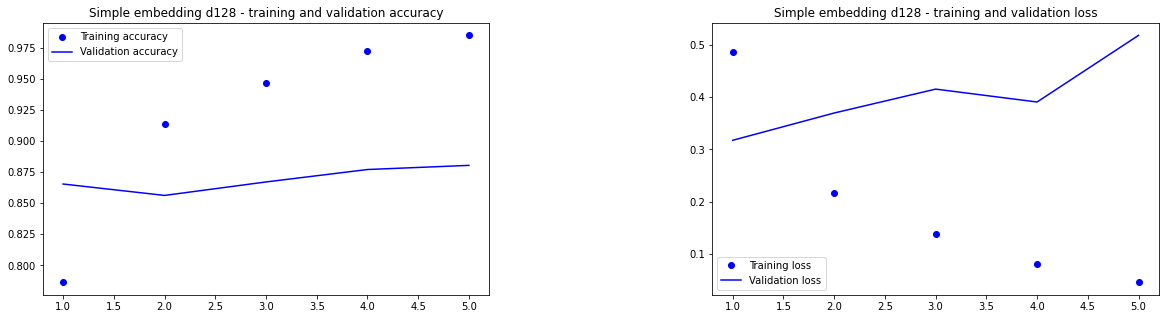

In [11]:
from approach import plotting
plotting.plot(history, 'Simple embedding d128')

In [12]:
from utils import plotting
plotting.plot(history, 'Naive embedding d128')

ImportError: cannot import name 'plotting' from 'utils' (unknown location)

### Evaluating approach

In [13]:
loss, acc = simple_embedding.evaluate_model(model, config, tokenizer, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 0s 5ms/step - loss: 0.4754 - acc: 0.8777
Loss: 0.4754032492637634
Accuracy: 87.77%


In [14]:
simple_embedding.predict_sample(model, config, tokenizer, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.13700956]


# Simple Embedding layer approach - dimension: 256

In [15]:
from approach import simple_embedding

config = simple_embedding.Config(256, MAX_WORDS, MAX_LEN)
model, history = simple_embedding.train(config, tokenizer, x_train, y_train)

Found 21090 unique tokens.
Shape of x: (12000, 1000)
Shape of y: (12000,)


Preparing to train the following model:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 256)         2560000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 256000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8192032   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 10,752,065
Trainable params: 10,752,065
Non-trainable params: 0
_________________________________________________________________
None


Training the model...

Epoch 1/5
300/300 [==============================] - 6s 19ms/step - loss: 0.9735 - acc: 0.653

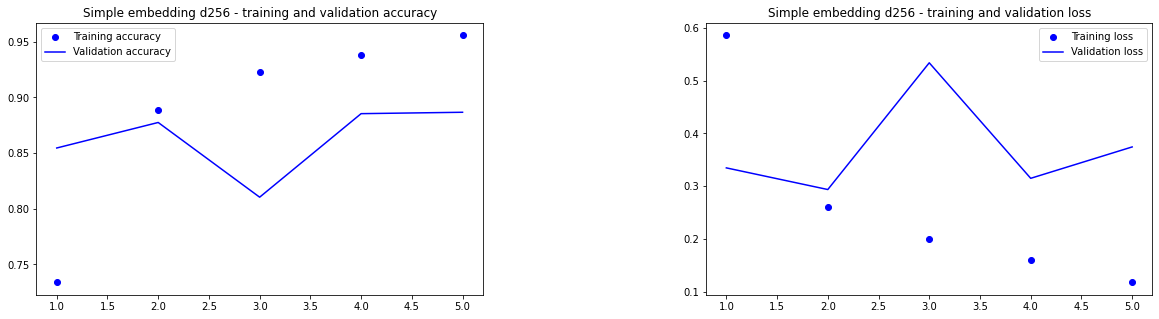

In [16]:
from approach import plotting
plotting.plot(history, 'Simple embedding d256')

In [ ]:
from utils import plotting
plotting.plot(history, 'Naive embedding d256')

### Evaluating the approach

In [17]:
loss, acc = simple_embedding.evaluate_model(model, config, tokenizer, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 1s 7ms/step - loss: 0.3521 - acc: 0.8903
Loss: 0.35208120942115784
Accuracy: 89.03%


In [18]:
simple_embedding.predict_sample(model, config, tokenizer, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.29575244]
